#### Scenario:
**You have been retained by a haulage company to analyse a dataset based on data collected from heavy
Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates
pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The
dataset’s positive class consists of component failures for a specific component of the APS system.
The negative class consists of trucks with failures for components not related to the APS. The data
consists of a subset of all available data, selected by experts. This analysis will help determine the
investment strategy for the company in the upcoming year.**

Data dictionary:

| <center> **Columns**  <center>   |  <center> **Value** <center>  |  <center> **D type**  <center> |  <center> **Description** <center>  |
| ----------- | ----------- | ----------- | ---- |
| <center>Class  <center>    | <center>neg/pos  <center>     | <center>String/Object<center> | <center> The dataset’s positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. <center>| 
| <center>All Other Columns <center>  | <center>0 to 8.584298e+09<center>        | <center>float<center> | <center>Component Sensor result<center>|

My first step is to import libraries I am going to use. 

In this analysis I will be using:
* **pandas** -  offers data structures and operations for manipulating numerical tables and time series (Pandas (software) - Wikipedia, 2021);
* **NumPy** - collection of high-level mathematical functions to operate on arrays (NumPy - Wikipedia, 2021);
* **Mathplotlib** - data visualization and graphical plotting library for Python and its numerical extension NumPy (What Is Matplotlib In Python?, 2021).
* **Seaborn** - a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. (Seaborn: statistical data visualization, 2021)
* **Scikit-learn** - an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. (Getting Started, 2021)

## The content:
### 1. Cleaning data and perfoming EDA
### 2. PCA
### 3. Checking model's accuracy
### 4. References

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After importing libraries I'll upload the dataset to Jupiter Notebook and, by calling *.head(10)*, will request to display first 10 rows to get a general idea of the dataset. Also, I want to see the size of the given dataset by running *.shape*.

In [2]:
df = pd.read_csv('aps_failure_set.csv')
df.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [3]:
df.shape

(60000, 171)

I can see immediately, that the dataset is too large, raw and dirty. Secondly, it appears that some of columns contain mostly '0' or 'na' values. Hence, my next step will be cleaning data, determining missing values and making decision on how to opperate them.

### 1. Cleaning data and perfoming EDA

To be able to clean the dataset I want to take a look at contained data types. To do so, I will run *.dtypes* method.

In [4]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

It comes into view, that although we see numbers represented in the dataset, the data types shown by calling *.dtypes* appear as an object. The reason for that is our 'na' observations. Therefore, I'm going to replace them with *np.nan* which the computer will automatically consider as 'Not a Number' values.

In [5]:
df = df.replace (['na'], np.nan)
df.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,NaN,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,NaN,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The next step I will perfom is to replace 'neg' and 'pos' categorical data with numbers '0' and '1' respectively. The reason I'm doing that is it's difficult to operate categorical data when it comes to building alghoritms and it can be difficult for the computer to process it.

In [6]:
df['class'].replace('neg', 0, inplace = True)
df['class'].replace('pos', 1, inplace = True)
df.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,81354,NaN,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,0,39308,NaN,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,0,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can see that the negative class which represents trucks with failures for components **not related** to the APS has been replaces with '0' and the positive class which represents trucks with failures for components **related** to the APS has been replaces with '1'. Next, let's count how many values belonging to each class the dataset has. 

In [7]:
df['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

*.value_counts()* method will display the total number of values which are associated with each class. Another way to get a better comprehension is to plot a graph to visualize the data. As the type of data I am looking at is a categorical data, the best graphical representation will be a countplot. Sharma (2018) explains in his article when we should use a countplot. 'There's a special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable.'

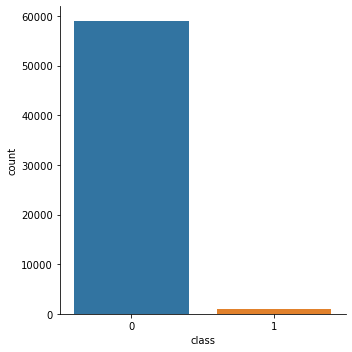

In [8]:
sns.catplot(x='class', kind='count', data=df)

Further action is to take a look at the data type again to comprehend how it has changed after determining missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(2), object(169)
memory usage: 78.3+ MB


It appears that the variables still have object data type while they are supposed to be float. Hence, I will manually convert the format. Sharma (2020) describes that the best way to convert one or more columns of a DataFrame to numeric values is to use *pandas.to_numeric()*. This function will try to change non-numeric objects (such as strings) into integers or floating-point numbers as appropriate. 
With changing the data type to numeric I also want to limit the number of decimal represented to 2 and will do it by running *.format*.

In [10]:
df = df.apply(pd.to_numeric)
pd.options.display.float_format = "{:.2f}".format 

Again I want to call *.dtypes* to make sure that this time the data format has been changed.

In [11]:
df.dtypes

class       int64
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

To determine the number of missing vaues per each column in the dataframe we can use Pandas’ *.isna().sum()* function. *.isna()*  extract values equal NaN, and *.sum()* count the amount.

I also want to calculate percentage of missing values and create a new dataframe, which will display amount and percent of missing values in descending order. Here is some extensions' explanation:
* **.sort_values(ascending=False)** - sort values in descending order;
* **columns=['Ammount']** - give a column name 'Ammount';
* **df.shape[0]** - index that represents numbers of observations;
* **columns=['Percent']** - give a column name 'Percent';
* **pd.concat** - concatenate two dataframes in one.

In [12]:
missing_data_amount = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Ammount'])
missing_data_percent = pd.DataFrame((df.isna().sum().sort_values(ascending=False)/df.shape[0])*100, columns=['Percent'])
missing_data = pd.concat([missing_data_amount, missing_data_percent], axis=1)
missing_data.head(20)

,Ammount,Percent
br_000,49264,82.11
bq_000,48722,81.20
bp_000,47740,79.57
bo_000,46333,77.22
ab_000,46329,77.22
cr_000,46329,77.22
bn_000,44009,73.35
bm_000,39549,65.92
bl_000,27277,45.46
bk_000,23034,38.39


Also, I want to plot a graph, so I can get a visual comprehension of the total ammount of missing values. I'm going to use the bar plot extension of the pandas library, as this way is the simpest way, and then I'm going combine some functions of seaborn and matplotlib in order to get a nice visualization. The reason why I'm plotting a bar plot is because a bar plot presents categorical data with rectangular bars. The lengths of the bars are proportional to the values that they represent (Pandey, 2021). I want to declare a variable 'g' which will contain the plot information. The X-axis will be components and the y-axis will be precentage of missing values belonging to components. Next, I'll define the bars' size, font size, color and axes' and the plot's titles.

Text(0, 0.5, 'Percentage of missing values')

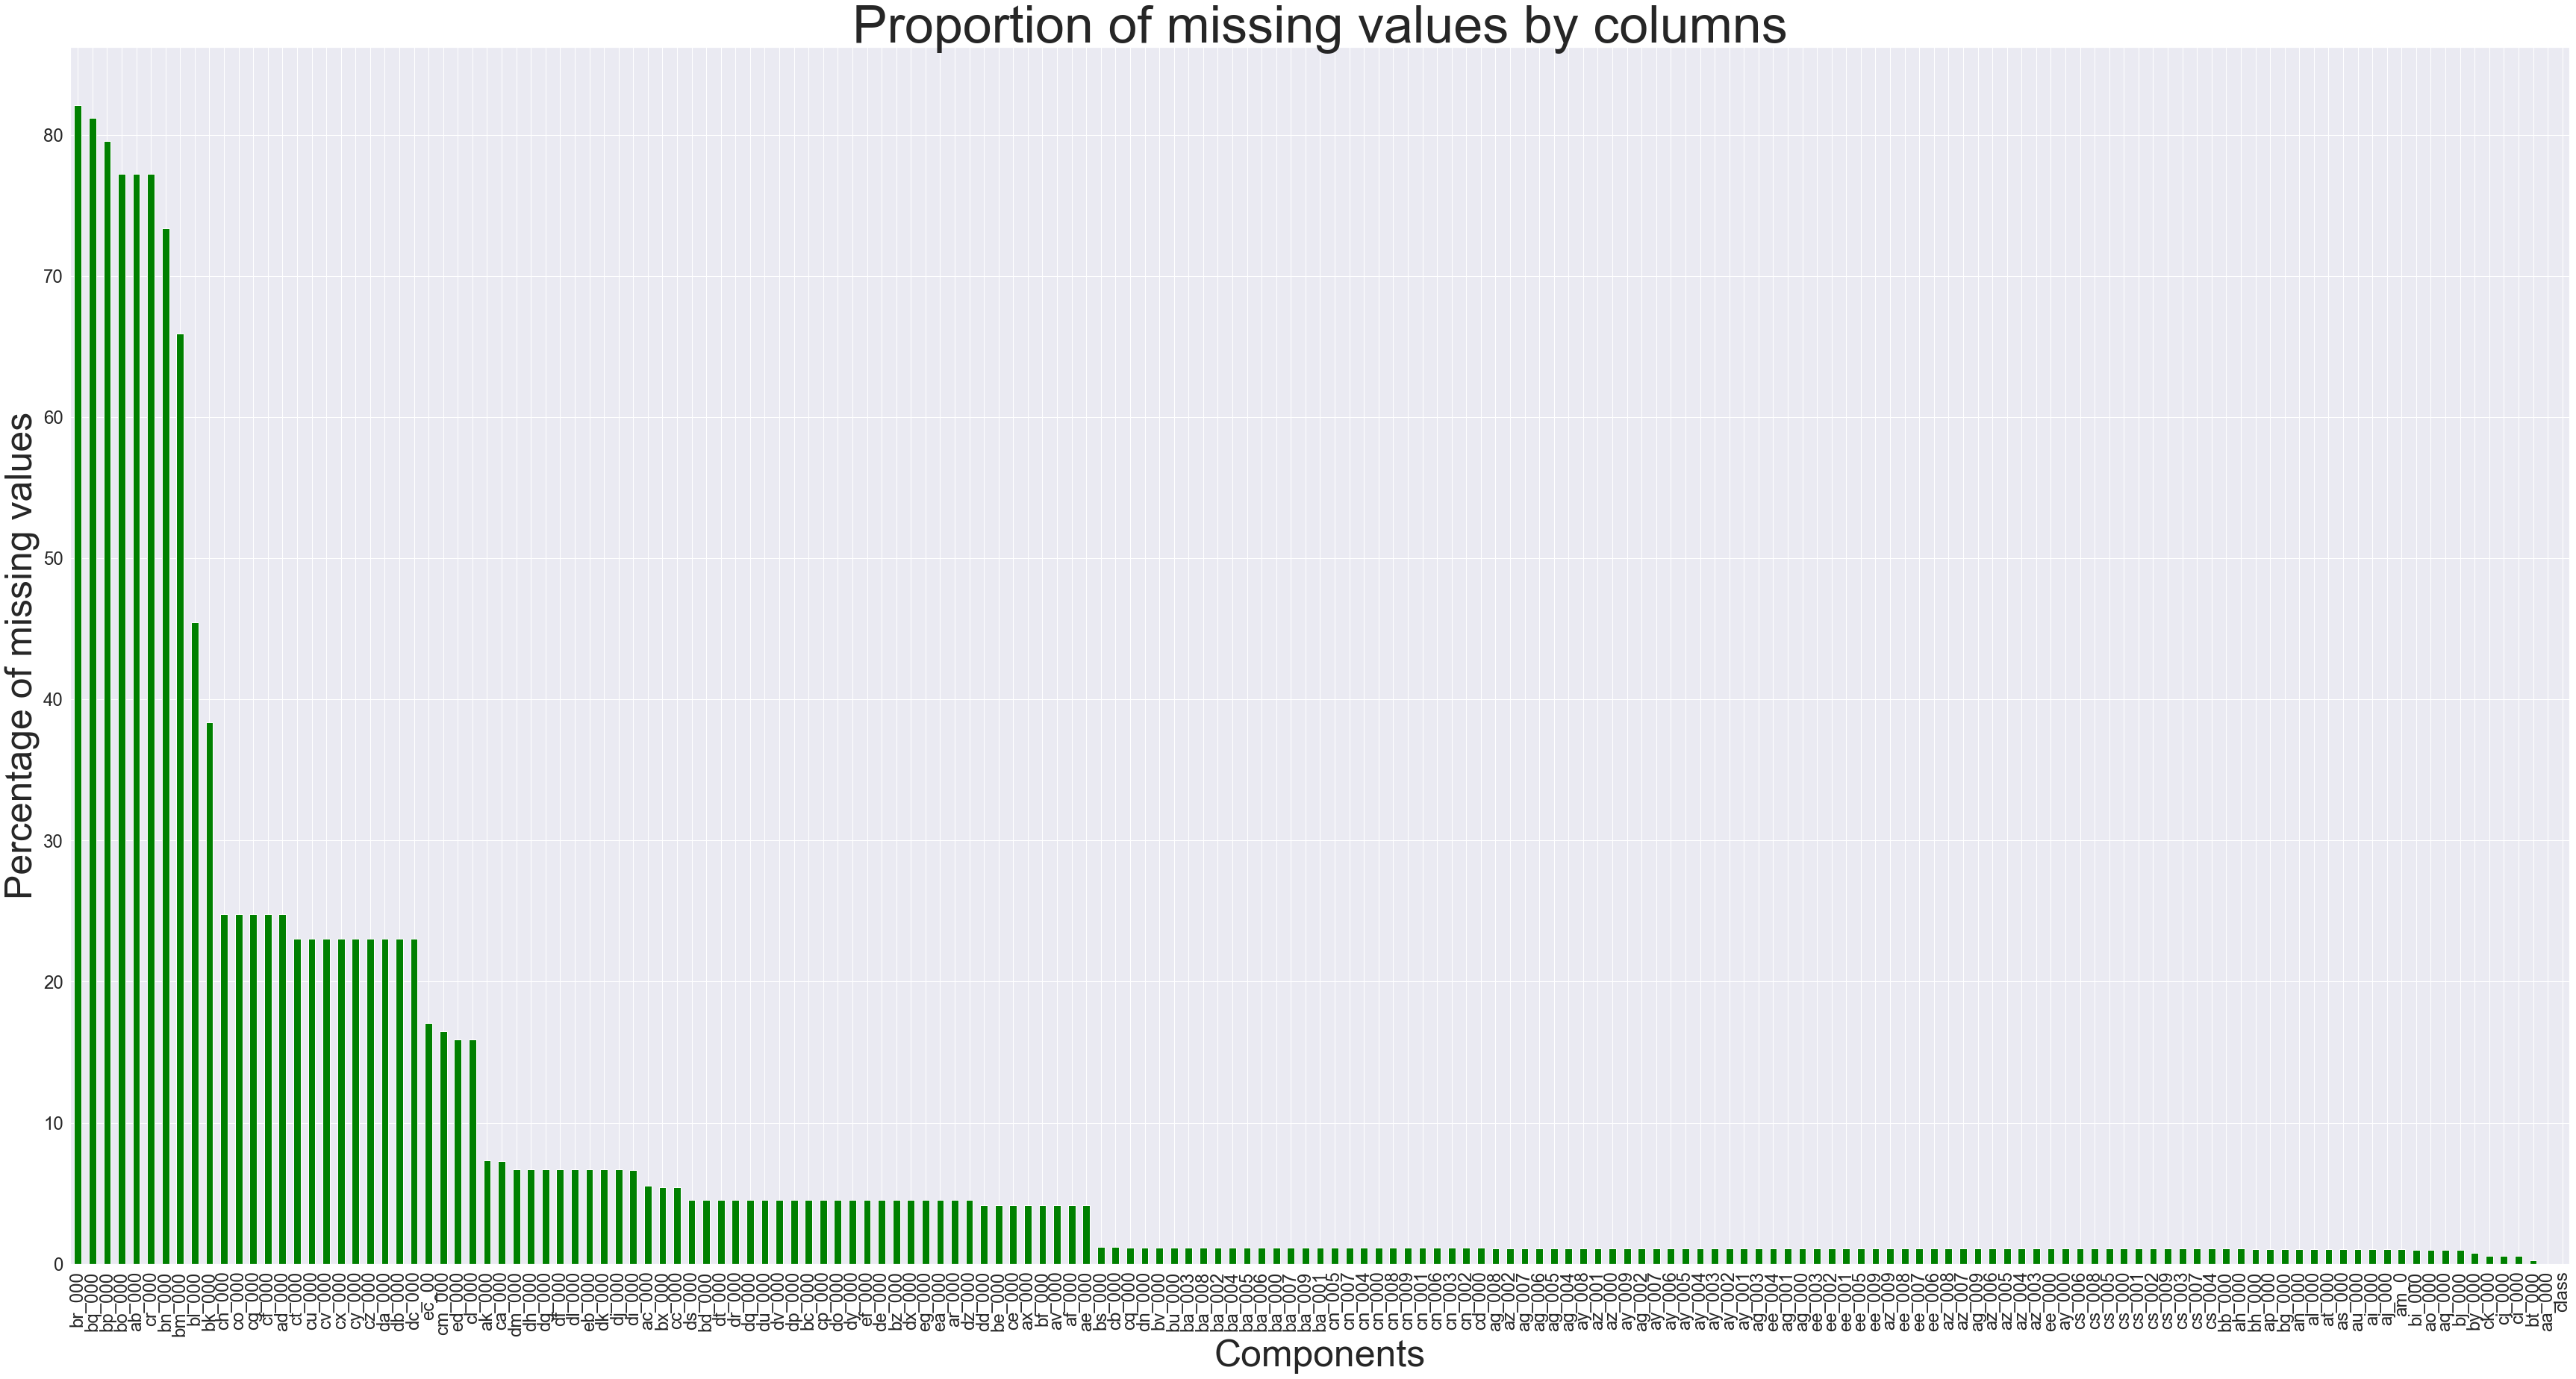

In [13]:
sns.set_theme(style="darkgrid")
g = missing_data['Percent'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'green')
g.set_title('Proportion of missing values by columns', fontsize=70)
g.set_xlabel('Components', fontsize=50)
g.set_ylabel('Percentage of missing values', fontsize=50)

I can observe that several columns have thousands of mising values and we need to make a decision how to handle them because almost each of the machine learning alghoritms that we would be interested in using will provide an error if we proceed NaN values into it. The simplest way to handle them is to just replace them with 0, but this method can reduce our model accuracy significantly. What I am going to do is to remove columns with more than 70% of missing values. My decision is based on the fact that we will not extract any  usefull information if we don't have any registered values. However, this way is an extreme way and can be used only if we have a significant amount of missing values. To remove unnecesary columns I will be using parameter 'tresh' of '.dropna' function. The parameter 'thresh' requires that many non-NA values in order to keep columns or rows from dropping. From the table above I can detect that 70% of missing values corresponds to 40000 amount approximately. In order to use the *.thresh* parameter correctly, I'll set it equal 20000.
* **axis = 1**, applies the function for columns.
* **thresh = 20000**, gives a command to keep columns with at least 20000 of non-NA values.

In [14]:
df_dropped = df.dropna(how='any',axis=1, thresh=20000)
df_dropped

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438.00,280.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1240520.00,493384.00,721044.00,469792.00,339156.00,157956.00,73224.00,0.00,0.00,0.00
1,0,33058,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,...,421400.00,178064.00,293306.00,245416.00,133654.00,81140.00,97576.00,1500.00,0.00,0.00
2,0,41040,228.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,...,277378.00,159812.00,423992.00,409564.00,320746.00,158022.00,95128.00,514.00,0.00,0.00
3,0,12,70.00,66.00,0.00,10.00,0.00,0.00,0.00,318.00,...,240.00,46.00,58.00,44.00,10.00,0.00,0.00,0.00,4.00,32.00
4,0,60874,1368.00,458.00,0.00,0.00,0.00,0.00,0.00,0.00,...,622012.00,229790.00,405298.00,347188.00,286954.00,311560.00,433954.00,1218.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,664.00,186.00,0.00,0.00,0.00,0.00,0.00,2564.00,...,998500.00,566884.00,1290398.00,1218244.00,1019768.00,717762.00,898642.00,28588.00,0.00,0.00
59996,0,2286,2130706538.00,224.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10578.00,6760.00,21126.00,68424.00,136.00,0.00,0.00,0.00,0.00,0.00
59997,0,112,2130706432.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,...,792.00,386.00,452.00,144.00,146.00,2622.00,0.00,0.00,0.00,0.00
59998,0,80292,2130706432.00,494.00,0.00,0.00,0.00,0.00,0.00,0.00,...,699352.00,222654.00,347378.00,225724.00,194440.00,165070.00,802280.00,388422.00,0.00,0.00


In [15]:
df_dropped.shape

(60000, 164)

It comes into view that after dropping features with more than 70% of missing values we have 164 left. It means that we've dropped 7 columns. However, we still have some columns with missing values and we should decide how to handle them, as machine learning algohritms will not be able to process them.

In [16]:
df_dropped.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438.00,280.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1240520.00,493384.00,721044.00,469792.00,339156.00,157956.00,73224.00,0.00,0.00,0.00
1,0,33058,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,...,421400.00,178064.00,293306.00,245416.00,133654.00,81140.00,97576.00,1500.00,0.00,0.00
2,0,41040,228.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,...,277378.00,159812.00,423992.00,409564.00,320746.00,158022.00,95128.00,514.00,0.00,0.00
3,0,12,70.00,66.00,0.00,10.00,0.00,0.00,0.00,318.00,...,240.00,46.00,58.00,44.00,10.00,0.00,0.00,0.00,4.00,32.00
4,0,60874,1368.00,458.00,0.00,0.00,0.00,0.00,0.00,0.00,...,622012.00,229790.00,405298.00,347188.00,286954.00,311560.00,433954.00,1218.00,0.00,0.00


What I am going to do is to replace the missing values with the last observed non-NA value. Pandas offers some basic functionalities in the form of the fillna method. Method 'ffill' or forward-fill , I'll  be using, propagates the last observed non-null value forward until another non-null value is encountered (Bosler F., 2019). In simple words, it will detect the last non-NA before the NA and replace it with its number. 

In [17]:
df_new = df_dropped.fillna(method='ffill')

In [18]:
df_new.isnull().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 164, dtype: int64

With the last check I can observe that all the missing values have been replaced.

Next, I'll be applying *.describe* method to get various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data. (Patil, 2018)

In [19]:
desc=df_new.describe()
desc

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,...,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00
mean,0.02,59336.50,357035720.70,143512.69,6.90,11.08,221.54,969.51,8558.45,88308.33,...,445334.31,210827.40,445052.88,393497.50,332637.73,345590.57,138491.76,8370.32,0.09,0.20
std,0.13,145430.06,795784908.18,35045247.11,165.89,213.43,20370.34,34012.67,149557.18,758544.06,...,1156942.68,541918.85,1164869.58,1119234.38,1067282.72,1723383.56,448542.15,47318.71,4.27,8.63
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,834.00,16.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2930.00,1164.00,2696.00,3589.00,510.00,110.00,0.00,0.00,0.00,0.00
50%,0.00,30776.00,152.00,126.00,0.00,0.00,0.00,0.00,0.00,0.00,...,233691.00,111948.00,221324.00,189731.00,91918.00,40992.00,3785.00,0.00,0.00,0.00
75%,0.00,48668.00,968.00,430.00,0.00,0.00,0.00,0.00,0.00,0.00,...,438396.00,218161.00,466290.00,402832.00,274868.00,167632.00,139392.50,2021.00,0.00,0.00
max,1.00,2746564.00,2130706796.00,8584297742.00,21050.00,20070.00,3376892.00,4109372.00,10552856.00,63402074.00,...,77933926.00,37758390.00,97152378.00,57435236.00,31607814.00,119580108.00,19267396.00,3810078.00,482.00,1146.00


In [20]:
df_new.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438.00,280.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1240520.00,493384.00,721044.00,469792.00,339156.00,157956.00,73224.00,0.00,0.00,0.00
1,0,33058,0.00,280.00,0.00,0.00,0.00,0.00,0.00,0.00,...,421400.00,178064.00,293306.00,245416.00,133654.00,81140.00,97576.00,1500.00,0.00,0.00
2,0,41040,228.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,...,277378.00,159812.00,423992.00,409564.00,320746.00,158022.00,95128.00,514.00,0.00,0.00
3,0,12,70.00,66.00,0.00,10.00,0.00,0.00,0.00,318.00,...,240.00,46.00,58.00,44.00,10.00,0.00,0.00,0.00,4.00,32.00
4,0,60874,1368.00,458.00,0.00,0.00,0.00,0.00,0.00,0.00,...,622012.00,229790.00,405298.00,347188.00,286954.00,311560.00,433954.00,1218.00,0.00,0.00


From the table above we are able to extract some informaton:
* in most of the features the mean is greated than the median. It can be explained by large outliers we have; 
* high number of the standard deviation indicates wide spread of the data, caused by outliers;
* features with 1st quartile (25%) equal 2nd quartile (50%) equal 3rd quartile (75%) equal 0 represent that 75% of the data is represented by 0 value.

Generally speaking, as we're dealing with highdimensional sparse data and a large number of outliers, visualizing any plots can be challenging. What I'll try to do is to plot histogram plots for all the columns I have. I'll use *.hist* function of the pandas library. By calling matplotlib.pyplot.hist(), I'll get histograms for each column representing the distribution of data.

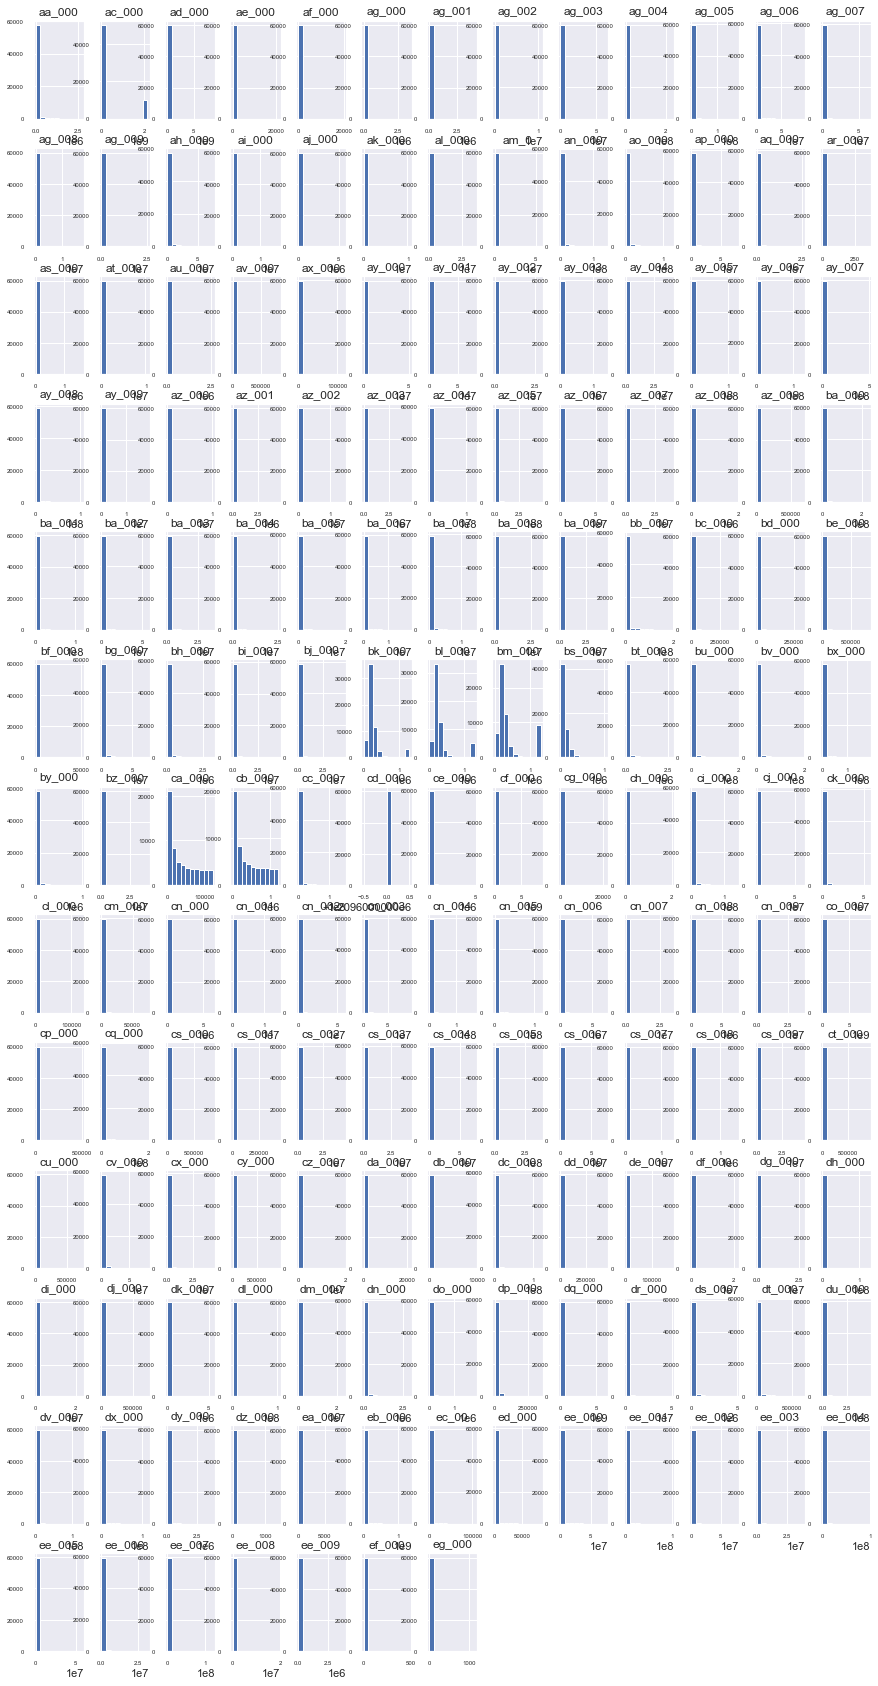

In [21]:
df_hist = df_new.drop(columns='class')
df_hist.hist(figsize=(15,30),bins=10,xlabelsize=6,ylabelsize=6);

From the graphs plotted above we can see that for most components value of component's failure cluster around 0. However, we have 6 plots, which distribution is drastically different. Let's plot some of these graphs separately to look at them closer.

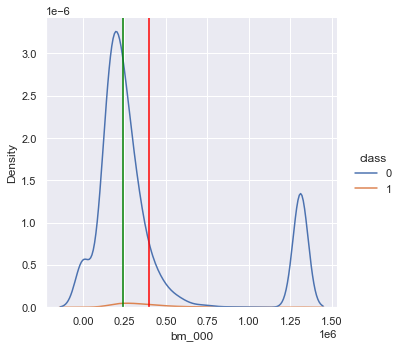

In [22]:
sns.displot(df_new, x='bm_000', hue='class', kind = 'kde')
mean1 = df_new['bm_000'].mean()
median1 = df_new['bm_000'].median()
plt.axvline(mean1, color='red')
plt.axvline(median1, color='green')

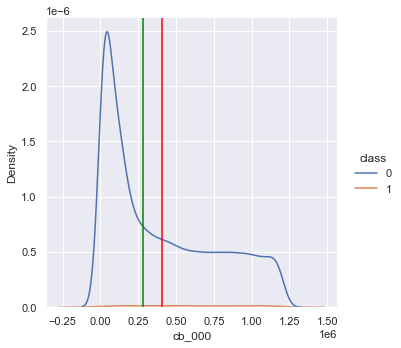

In [23]:
sns.displot(df_new, x='cb_000', hue='class', kind = 'kde')
mean2 = df_new['cb_000'].mean()
median2 = df_new['cb_000'].median()
plt.axvline(mean2, color='red')
plt.axvline(median2, color='green')

We see that both graphs are right skewed/positively as we have more data clustered on the right side. The mean which is greater than the median also represents the positive skewed distribution. We also have more numbers represented for the negative class than for positive.

In [24]:
df_new.columns[np.where(desc.loc['std'] < 0.005)].values

array(['cd_000'], dtype=object)

In [25]:
corr = df_new.corr()
np.fill_diagonal(corr.values, 0)
(corr>0.999).sum().sum()/2
corr.abs().unstack().sort_values(kind="quicksort", ascending=False)[:10]

bv_000  cq_000   1.00
cq_000  bv_000   1.00
bu_000  cq_000   1.00
cq_000  bu_000   1.00
bu_000  bv_000   1.00
bv_000  bu_000   1.00
ad_000  cf_000   1.00
cf_000  ad_000   1.00
        co_000   1.00
co_000  cf_000   1.00
dtype: float64

### 2. PCA

**What is dimensionality reduction and PCA?**
Dinkar (2021) explains that dimensionality Reduction is simply reducing the number of features (columns) while retaining maximum information. PCA (Principal Component Analysis) is one of the methods for dimensionatily reduction. Its idea is simple—reduce the dimensionality of a dataset, while preserving as much ‘variability’ (i.e. statistical information) as possible (Jolliffe and Cadima, 2016).

First step of PCA is to separate our target variable from the rest of the dataset. Our target variable in this case is 'class' and I'll record it as **y** and the rest of our table will be recorded as **X**.

In [26]:
X = df_new.drop(columns='class')
y = df_new['class']

Next, I am going to scale the data. As we are dealing with sparse data with lot's of outliers, I'll be using 'RobustScaler'. The reason for that is that the centering and scaling statistics of RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers unlike other scalers. (Compare the effect of different scalers on data with outliers, 2021)

In order to do this we should import RobustScaler from sklearn.preprocessing. Then I'll train out features recorded as **X** with *.fit* parameter and the last step is to apply the transformation to the dataset by running *.transform*.

In [27]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler().fit(X)
robust = robust.transform(X)

After scaling the data we get it recorded as an array. To be able to take a look at it I'm going to rebuild it in a DataFrame. In order to keep columns' names, I'll print them all and then record them in the dataframe.

In [28]:
print(df_new.columns.tolist())

['class', 'aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'c

In [29]:
df_scaled = pd.DataFrame(robust, columns = ['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000', 'cp_000', 'cq_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000'])
pd.options.display.float_format = "{:.4f}".format 
df_scaled.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.9600,2238136.8550,0.3793,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6819,...,2.3121,1.7578,1.0779,0.7015,0.9012,0.6982,0.4982,0.0000,0.0000,0.0000
1,0.0477,-0.1597,0.3793,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2962,...,0.4311,0.3047,0.1553,0.1395,0.1521,0.2397,0.6729,0.7422,0.0000,0.0000
2,0.2146,0.0798,-0.0640,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0410,...,0.1003,0.2206,0.4372,0.5506,0.8340,0.6986,0.6553,0.2543,0.0000,0.0000
3,-0.6431,-0.0861,-0.1478,0.0000,10.0000,0.0000,0.0000,0.0000,318.0000,-0.0296,...,-0.5361,-0.5157,-0.4773,-0.4751,-0.3350,-0.2447,-0.0272,0.0000,4.0000,32.0000
4,0.6292,1.2773,0.8177,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8139,...,0.8917,0.5431,0.3968,0.3944,0.7109,1.6151,3.0860,0.6027,0.0000,0.0000


We see how our dataset has changed after scaling. RobustScaler doesn't use the mean, as using mean with large number of outliers is useless. Instead, it used median and first and third quartile. The formula the RobustScaler uses is:
* value = (value – median) / (p75 – p25)

The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values. (Brownlee, 2020)

Next step is to run PCA. Assement task requires us **to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have
discovered.**

My first step will be importing PCA from sklearn.decomposition. Then I'll train it in order to retain 99.5% variance and I'll call the number of components (*.n_components_*) to see the required number.

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(0.995).fit(robust)
number = pca.n_components_
number

2

My next step here is to plot the grap where we can clearly see how many components require for retaining certain variance in the data. The X-axis will be a number of components and the Y-axis will be cumulative explained variance ratio. The red line will represent the number of components in order to retain 99.5% variance.

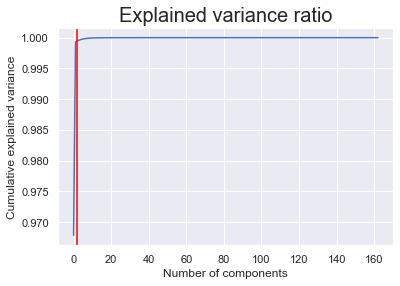

In [32]:
pca = PCA().fit(robust)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 20)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axvline(number, color = 'red')

We can observe that required number of components for retaining 99,5% variance in the data is 2. Next, I'm going to train the data for required 2 number of components. I also want to build a bar plot to see how many explained varience each of two components has. I'll record the array into the DataFrame in order to plot the barchart.

In [33]:
pca = PCA(n_components=2)
projected = pca.fit_transform(robust)

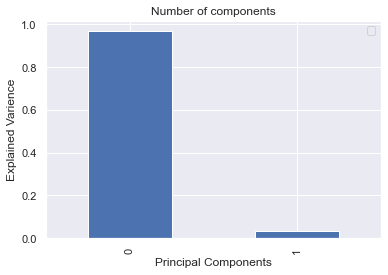

In [34]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.title('Number of components')
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [35]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.96786148, 0.03143879])

From the plot above as well as from the code line we can see that the first component contains the most of the information. PC1 contributed around 97% while PC2 contributed 3%.Explained_variance_ratio returns the percentage of variance explained by each of the selected components. 

The last step in this chapter is to generate a DataFrame with 2 defined components and our target variable 'class'.

In [36]:
principal_df = pd.DataFrame(data = projected, columns = ['PC 1','PC 2'])
final_df = pd.concat([principal_df, df_new['class']], axis = 1)
final_df.head(20)

,PC 1,PC 2,class
0,-4522716.3117,-71896.8797,0
1,-4522589.2894,-71700.7701,0
2,-4522589.2923,-71701.8567,0
3,-4520571.7723,-71700.8127,0
4,-4522589.1302,-71701.8795,0
5,-4522716.3130,-71896.9645,0
6,-4522589.2881,-71700.8555,0
7,-4522716.3129,-71896.9642,0
8,-4522589.2287,-71700.8925,0
9,-4516817.1056,-71841.5981,1


### 3. Cheking models' accuracy

Now let's create some models and estimate their accuracy on hiden data. We'll start with *train_test_split*. I want to define train size equal 90% and test size equal 10% and a random state we will start with will be 1.

In [37]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns='class').values
y = final_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54000, 2), (6000, 2), (54000,), (6000,))

On this stage I don’t know which algorithm will be good enough on this exact dataset.
I'm going to try 4 different alghoritms I've already learned:
* **Logistic Regression** 
* **Decision Tree Classifier**
* **KNeighbors Classifier**
* **Random Forest Classifier**

For this purpose I'm going to import the next libraries:
* **cross_val_score** - is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset. (Brownlee, 2020); 
* **LogisticRegression** - machine learning model Logistic Regression (sklearn.metrics.confusion_matrix, 2021);
* **DecisionTreeClassifier** - machine learning model Decision Tree Classifier;
* **KNeighborsClassifier** - machine learning model KNeighbors Classifier;
* **RandomForestClassifier** - machine learning model Random Forest Classifier;
* **confusion_matrix** - compute confusion matrix to evaluate the accuracy of a classification;
* **accuracy_score** -Accuracy classification score (sklearn.metrics.accuracy_score, 2021); 
* **classification_report** Build a text report showing the main classification metrics (sklearn.metrics.classification_report, 2021).


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

We use square brackets [ ] to create an empty list. Also we use *.append* method for adding a single item to the existing list (Kumar, 2019).
What I am going to do next is to call the models:
* **Logistic Regression**;
* **KNeighborsClassifier**;
* **DecisionTreeClassifier**;
* **RandomForestClassifier**;

and then check their accuracy.

In [39]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))

I will create two empty lists named 'results' and 'names', where I record my results.  In Python, the list is a type of container in Data Structures, which is used to store multiple data at the same time. Lists in Python are ordered and have a definite count. To iterate over a list, we need to use the for loop statement as follow:
* **for** item **in** list.

In [40]:
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Logistic Regression: 0.947944 (0.017735)
KNeighbors Classifier: 0.982704 (0.000566)
Decision Tree Classifier: 0.981000 (0.000994)
Random Forest Classifier: 0.985333 (0.000737)


Comparing and evaluating accuracy of all the analyzed models we can note that the Random Forest Classifier has perfomed better than the other ones, although the accuracy is similar overall. Let's build a classification report and a confusion matrix for the Random Forest Classifier model.

In [41]:
model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9845
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5892
           1       0.63      0.34      0.44       108

    accuracy                           0.98      6000
   macro avg       0.81      0.67      0.72      6000
weighted avg       0.98      0.98      0.98      6000

[[5870   22]
 [  71   37]]


Although our accuracy is very good (98%) we can see that our precision and recall are not high enough. It caused by our imbalanced data. By looking at the confusion matrix I can say that 5870 of 5892 of the testing part have been identified correctly as **True Negative** and 37 have been identified as **True Positive**. However, 22 entries have been identified as **False Positive** (*Type I error*) and 71 as **False Negative** (*Type II error*). What it simply means is that 22 values were negative but the model predicted them as positive values and 71 values were positive but the model predicted them as negative values. Here come parametres 'precision' and 'recal' of the confusion matrix.
Bhandari (2020) gives us an example of these two metrics. Precision tells us how many of the correctly predicted cases actually turned out to be positive.
Here’s the formula for calculating Precision:
* precision = TP / (TP + FP)

Recall tells us how many of the actual positive cases we were able to predict correctly with our model.
And here’s the formula for calculating Recall:
* recall = TP / (TP + FN) 

The decision on what metrics we need to focus (precision or recall) comes from the bussiness needs. Let's assume, that to make FN errors is more expensive than to make FP, in this case we see, that fixing FN error prediction will cost us more money than fixing FP errors.

We can fix it by changing *threshold* (threshold = 0.5 by default) and increasing recall. For this purpose I'm going to import and run precision_recall_curve. Precision_recall_curve computes precision-recall pairs for different probability thresholds (sklearn.metrics.precision_recall_curve, 2021)

In [43]:
from sklearn.metrics import precision_recall_curve

I'm going to call the *.predict_proba* method to identify predicted probabilities for class 1 and then store them in y_score. Then I want to plot a graph to see how precision and recall interact to each other.

In [44]:
y_score = model.predict_proba(X_test)[:,1]

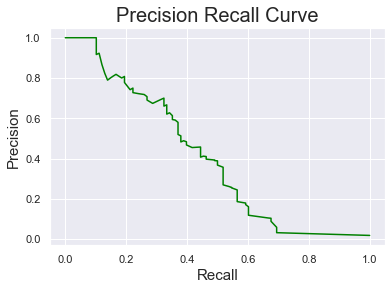

In [45]:
precision, recall, threshold = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='green')
ax.set_title('Precision Recall Curve', fontsize = 20)
ax.set_ylabel('Precision',fontsize = 15)
ax.set_xlabel('Recall', fontsize = 15)
plt.show()

We see that with the growth of **the recall metric the precision metric** goes down and vice versa. By manually picking values I have got the best value ***y_score > 0.0075*** in order to keep 'recall' metric high enough. Let's apply this number to see that happens.

In [46]:
y_pred_test_rf = y_score > 0.0075
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_rf).ravel()
print(classification_report(y_test, y_pred_test_rf))
print(confusion_matrix(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5892
           1       0.10      0.68      0.18       108

    accuracy                           0.89      6000
   macro avg       0.55      0.78      0.56      6000
weighted avg       0.98      0.89      0.93      6000

[[5257  635]
 [  35   73]]


We see that in this case the number of values identified as ***False Positive*** has increased drastically. However, the number of values identified as ***False Negative*** has halved. As we assumed that FN is more expensive that FP then our model shows a good result. 

As I mentioned before, it's quite difficult for imbalanced data to find the perfect value for both precision and recall metrics, therefore it depends on business tasks what metric we can sacrifice.

**Conclusion:** In this project I perfomed an EDA and plotted some graphs to look closer at the dataset we have. Using learned techniques I was able to determine and handle missing values and explained the steps I had perfomed. I scaled the data using RobustScaler and explained the reason I used this particular scaler and after I perfomed a PCA on the scaled data and established the minimum number of features needed in order to retain the certain percentage of variance. Then I compared accuracy of different models, such as Logistic Regression, KNeighbors Classifier, Decision Tree Classifier, Random Forest Classifier. As a result of my work I defined the model with the best perfomance - **RandomForestClassifier** and prepared the data for further operations of the ML algorithm. 